<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/TrafficAnalysisandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: traffic-analysis-and-prediction

### Description

 The Intelligent Transportation System (ITS) is part of several smart city applications where it enhances the processes of transportation and commutation. ITS aims to solve traffic problems, mainly traffic congestion. In recent years, new models and frameworks for predicting traffic flow have been rapidly developed to enhance the performance of traffic flow prediction, alongside the implementation of Artificial Intelligence (AI) methods such as machine learning (ML). In this project we are trying to analysis and predict the traffic and junction label.  

### Learning Objectives

At the end of the mini project, you will be able to understand-
 
* convert the dataset to time series dataset
* predict the flow of traffic at any junction



In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Graded Exercise (10 Marks)


#### Load the dataset

In [ ]:

from google.colab import files
  
  
uploaded = files.upload()

Saving traffic.csv to traffic.csv


In [ ]:
df = pd.read_csv('traffic.csv', parse_dates=True, index_col='DateTime')
df

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


**Extract Year, Month, Day, Hour** from **index**  (1 marks)


In [ ]:
# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()
df.head()

,Junction,Vehicles,ID,Year,Month,Day,Hour
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0
2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1
2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2
2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3
2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4


**Drop the ID column**

In [ ]:
df.drop('ID', axis=1, inplace=True)
df

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0
2015-11-01 01:00:00,1,13,2015,11,1,1
2015-11-01 02:00:00,1,10,2015,11,1,2
2015-11-01 03:00:00,1,7,2015,11,1,3
2015-11-01 04:00:00,1,9,2015,11,1,4
...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,2017,6,30,19
2017-06-30 20:00:00,4,30,2017,6,30,20
2017-06-30 21:00:00,4,16,2017,6,30,21


#### Data Exploration : (1 Mark)
Plot the histogram

In [ ]:
def make_hist(junction=1):
    data = df[df['Junction'] == junction]
    f, ax = plt.subplots(figsize=(15, 5))
    ax = sns.histplot(data['Vehicles'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

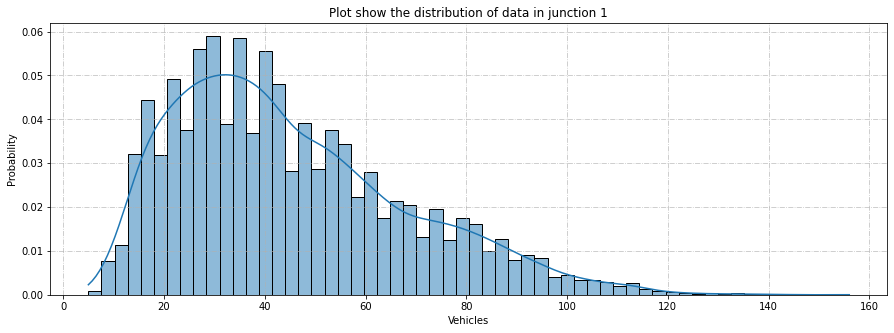

In [ ]:
make_hist(1)

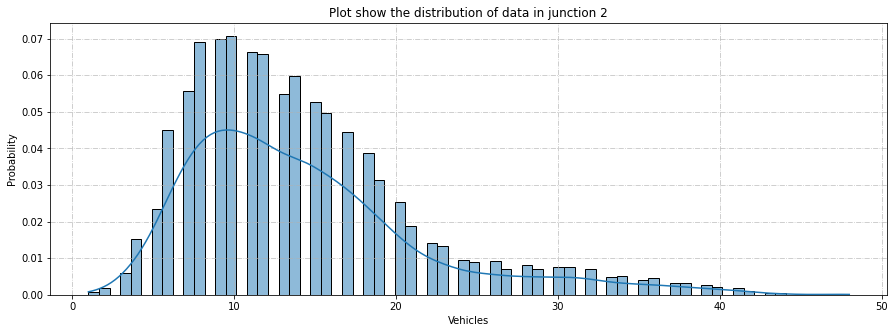

In [ ]:
make_hist(2)

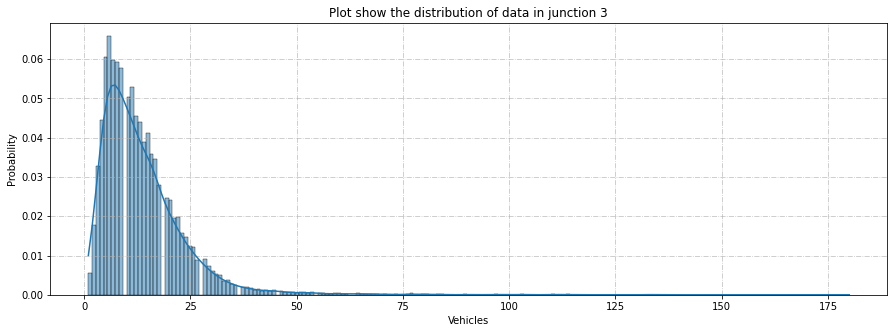

In [ ]:
make_hist(3)

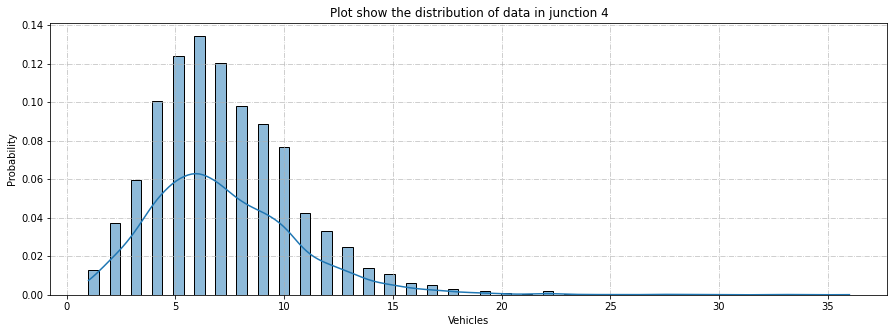

In [ ]:
make_hist(4)

#### Time series plot : (1 Mark)

In [ ]:
def time_series_plot(junction=1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df[df.Junction == junction]
    ax = sns.lineplot(data=data, y='Vehicles', x='DateTime', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

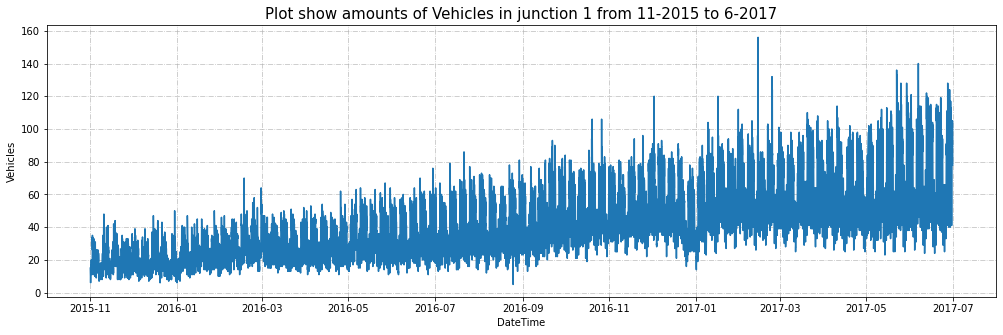

In [ ]:
time_series_plot(1)

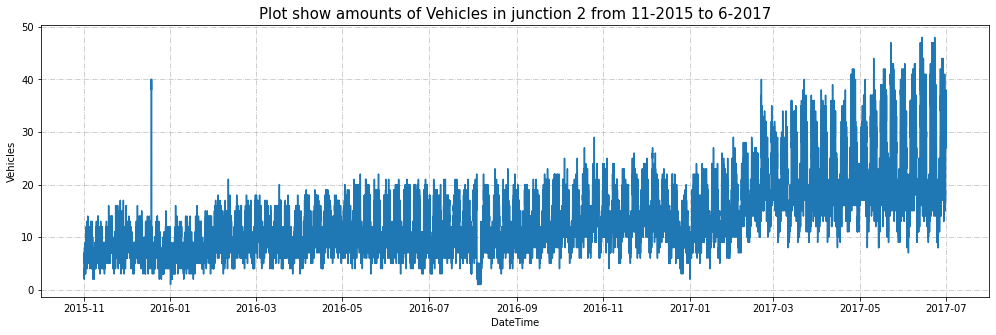

In [ ]:
time_series_plot(2)

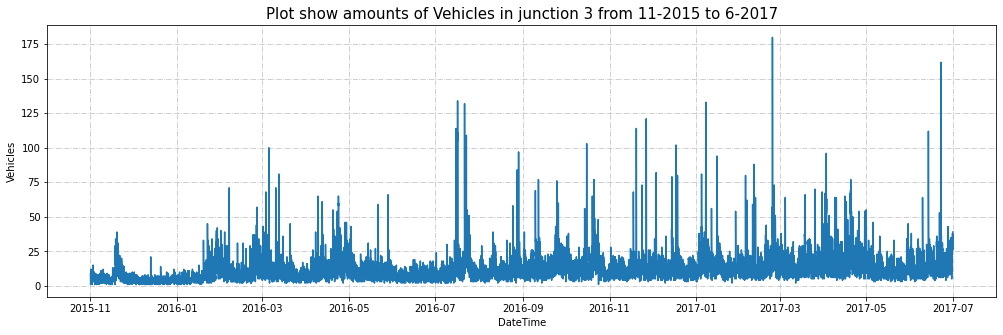

In [ ]:
time_series_plot(3)

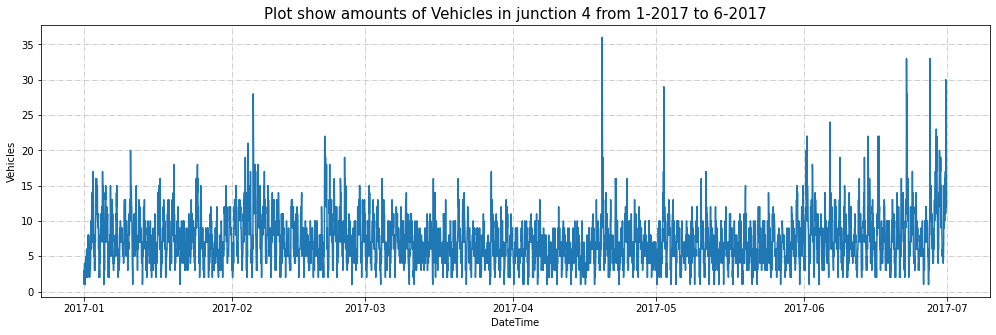

In [ ]:
time_series_plot(4)

#### Visualization : (1 Mark)
Plot the Normal data histogram of Vehicles by year and Junction on a single figure

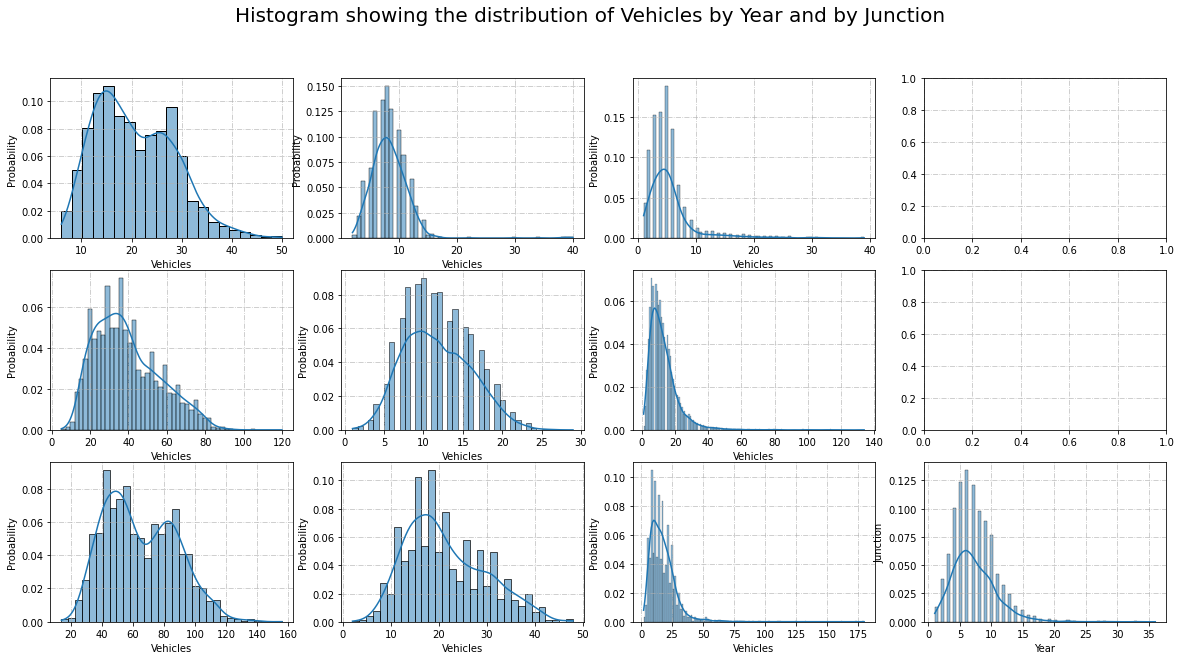

In [ ]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction', fontsize=20)
plt.show()

#### Data Engineering : (1 Mark)
- Scale the Data using `StandardScaler`
- Compute the Score data distribution 
- Plot the Histogram with Z Score Vehicles from the Data with (Mean = 0 and Standard Deviation = 1)

In [ ]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [ ]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


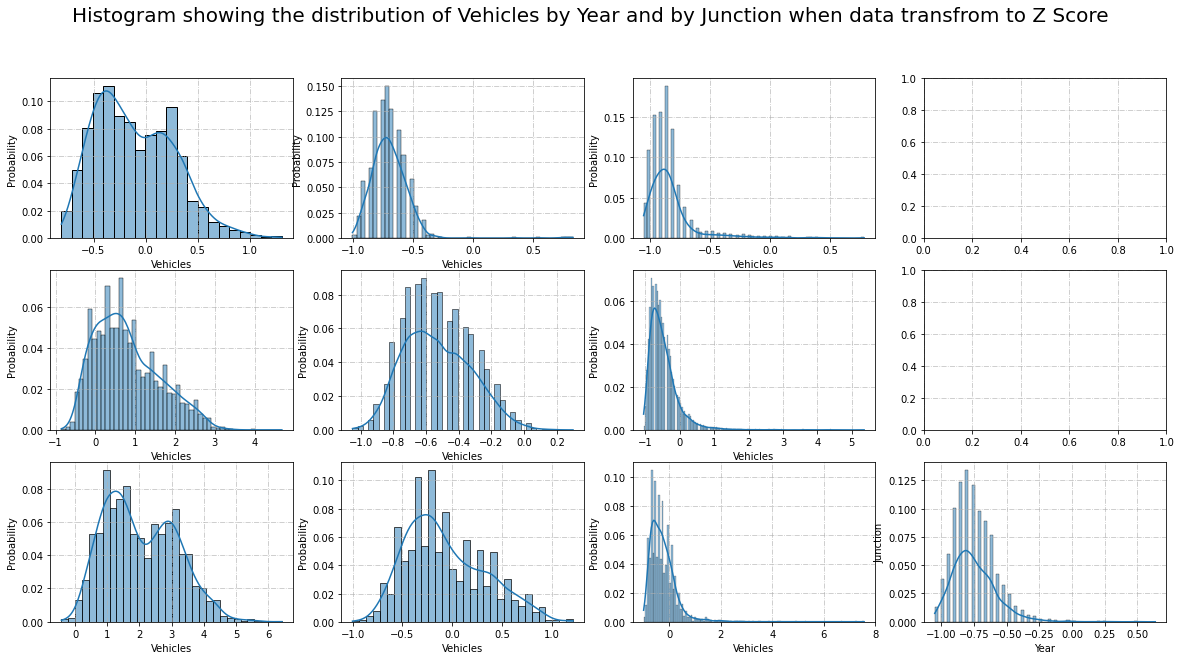

In [ ]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in enumerate(range(2015, 2018)):
  for j, junction in enumerate(range(1, 5)):
    sns.histplot(z_df[(z_df.Junction == junction) & (z_df.Year == year)]['Vehicles'], kde=True, ax=axis[i, j], stat='probability')
    axis[i, j].grid(True, alpha=0.75, ls='-.')
    
plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Histogram showing the distribution of Vehicles by Year and by Junction when data transfrom to Z Score', fontsize=20)
plt.show()

#### Visualization : (1 Mark)

On a single Picture, display the number of vehicles on Y axis with X axis as the Junctions, with each subplot being a BoxPlot/ViolinPlot

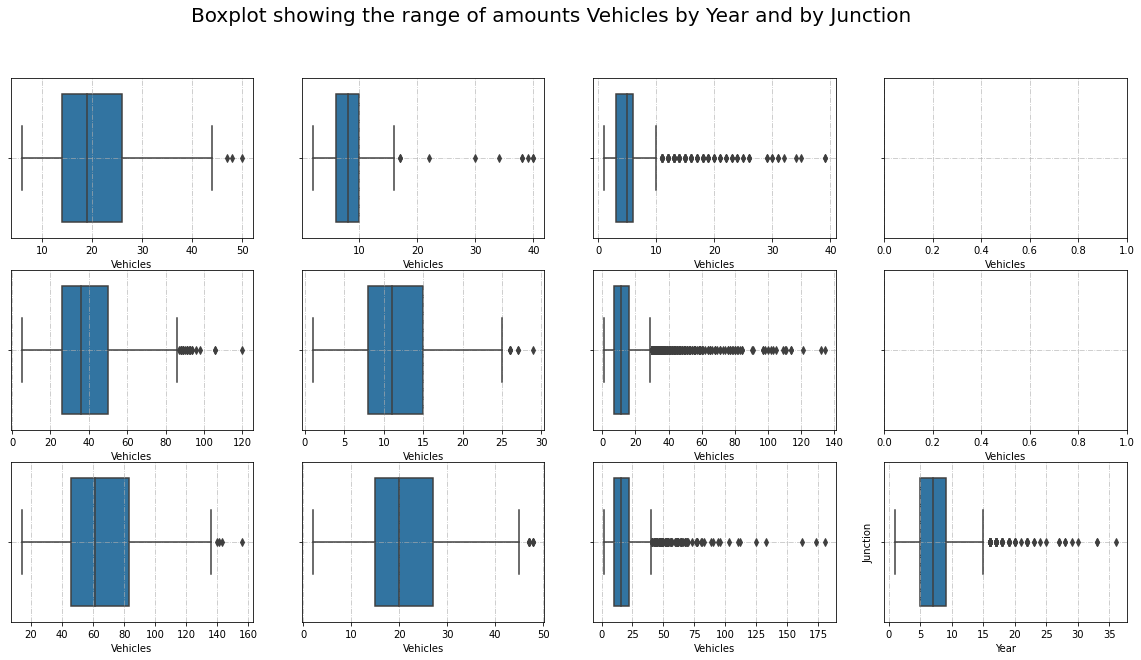

In [ ]:
f, axis = plt.subplots(3, 4, figsize=(20, 10))

for i, year in zip(range(3), range(2015, 2018)):
  for j, junction in zip(range(4), range(1, 5)):
    sns.boxplot(x=df[(df.Junction == junction) & (df.Year == year)]['Vehicles'], ax=axis[i, j])
    axis[i, j].grid(True, alpha=0.75, ls='-.')

plt.xlabel('Year')
plt.ylabel('Junction')
f.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

In [ ]:
def get_list_data(dataf, drop=[]):

  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [ ]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


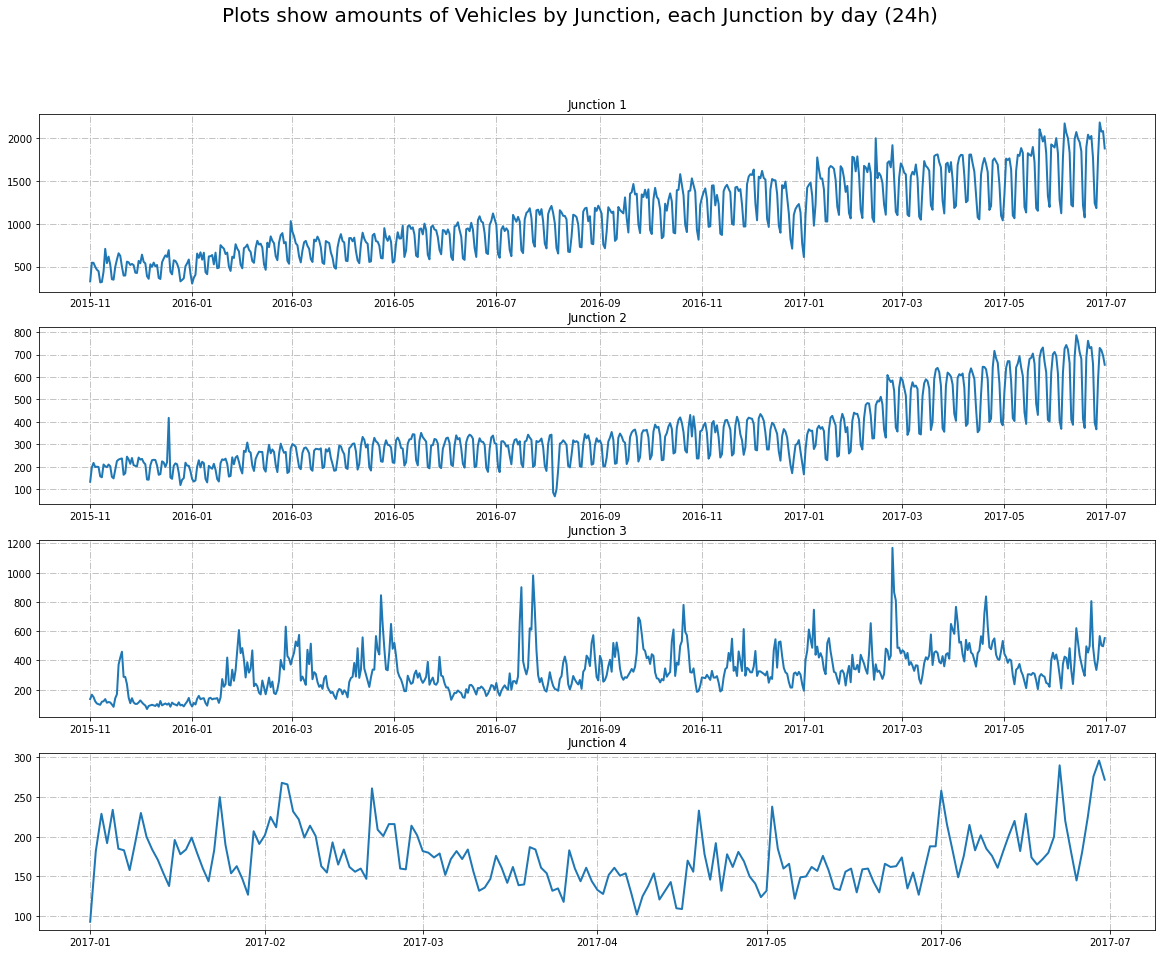

In [ ]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('D').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (24h)', fontsize=20);

#### Visualization : (1 Mark)


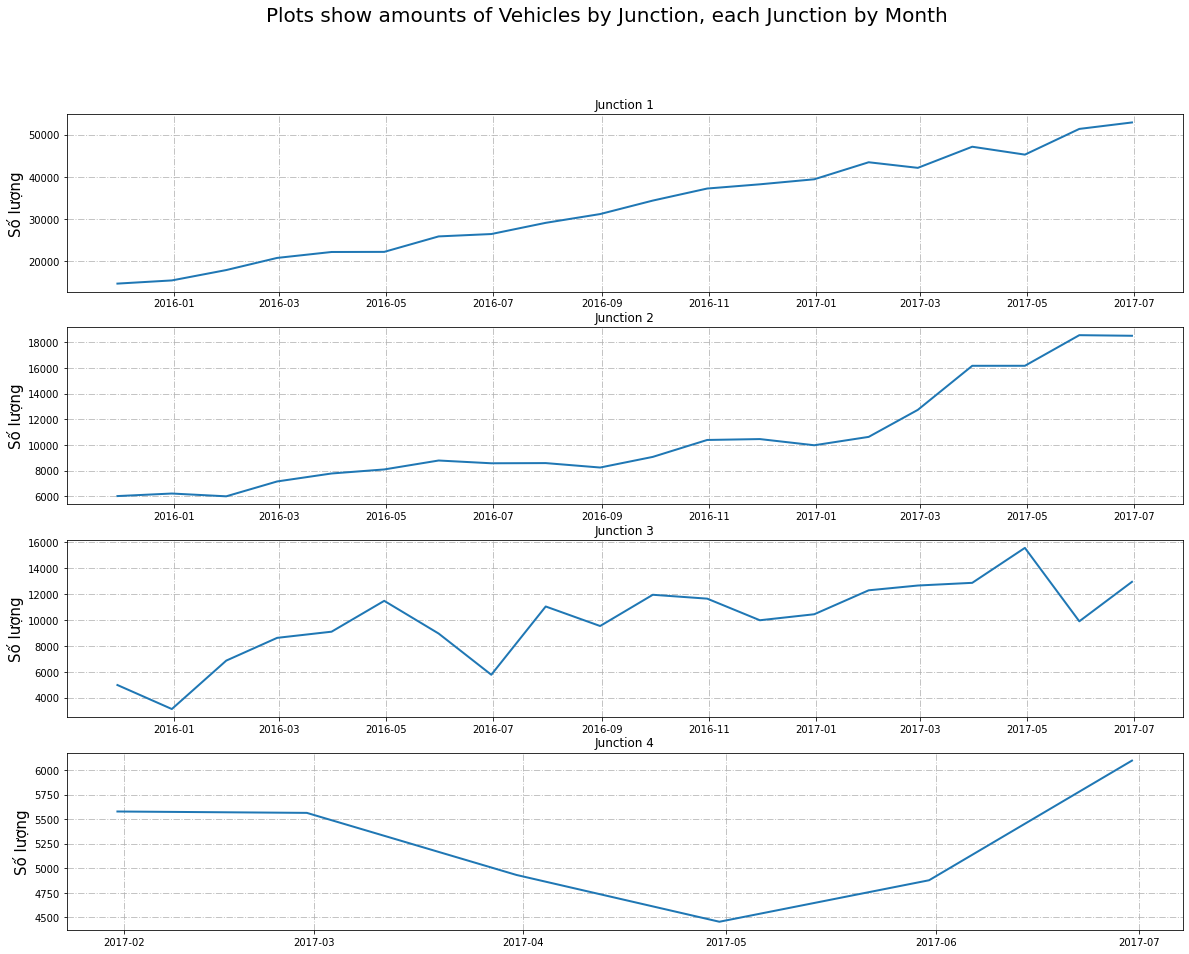

In [ ]:
f, ax = plt.subplots(nrows=4, figsize=(20, 15))
for i in range(4):
    ax[i].plot(data[i + 1].resample('M').sum().Vehicles, label=f'Vehicles of {i + 1} Junction', lw=2)
    ax[i].grid(True, alpha=0.75, lw=1, ls='-.')
    ax[i].set_ylabel('Số lượng', fontsize=15)
    ax[i].set_title(f'Junction {i + 1}')
f.suptitle('Plots show amounts of Vehicles by Junction, each Junction by Month', fontsize=20);

#### Visualization : (1 Mark)
Plot the following curves on a single panel for each of the 4 junctions:

- The number of vehicles
- Rolling Mean
- Rolling Standard Deviation

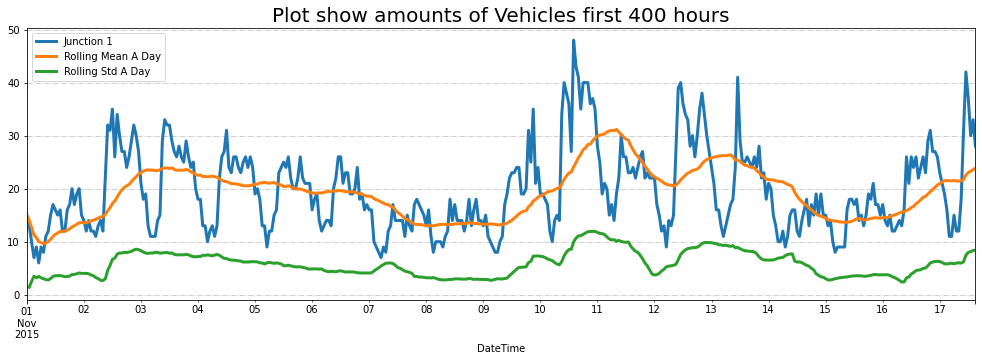

In [ ]:
# Junction 1
f, ax = plt.subplots(figsize=(17, 5))
foo = data[1][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 1', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

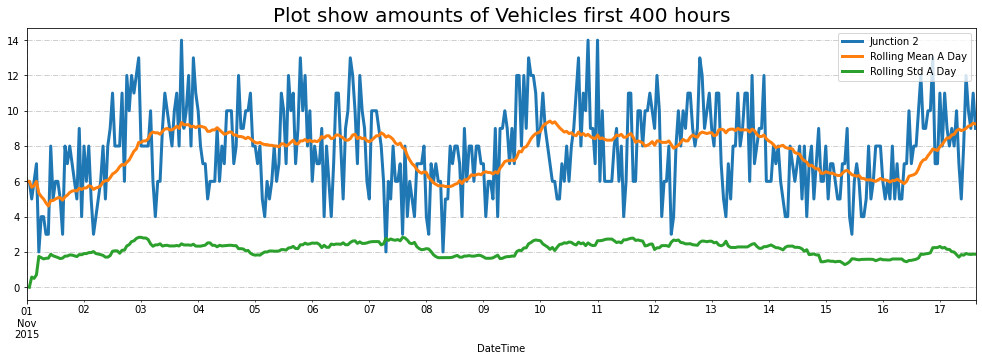

In [ ]:
# Junction 2
f, ax = plt.subplots(figsize=(17, 5))
foo = data[2][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 2', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

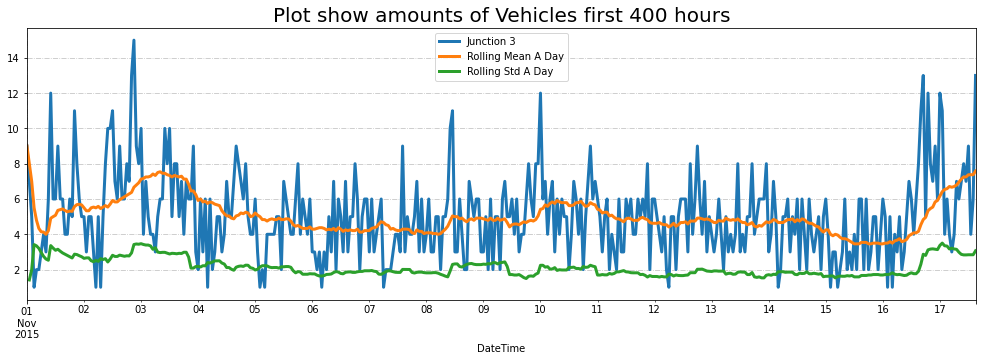

In [ ]:
# Junction 3
f, ax = plt.subplots(figsize=(17, 5))
foo = data[3][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 3', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

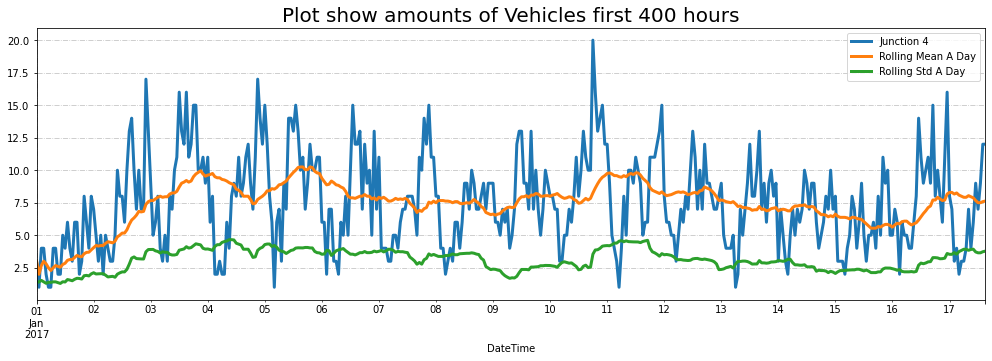

In [ ]:
# Junction 4
f, ax = plt.subplots(figsize=(17, 5))
foo = data[4][:400]
foo.Vehicles.plot(lw=3)
foo.Vehicles.rolling('D').mean().plot(lw=3)
foo.Vehicles.rolling('D').std().plot(lw=3)
plt.legend(['Junction 4', 'Rolling Mean A Day', 'Rolling Std A Day'])
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()

Use the below Custom function `make_metrics` function to return R² Score and RMSE from a list of models

In [ ]:
def get_list_data(dataf, drop=[]):

  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [ ]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

Create a function to create a new dataset

In [ ]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


Use the below class for a timeframe for machine learning model

In [ ]:
class Model:
  def __init__(self, name, data, predict_features, test_size, ml_model):
    self.name = name
    self.data = data
    self.predict_features = predict_features
    self.is_trained = False
    self.test_size = test_size
    self.ml_model = ml_model
    self.do_things()

  def cal_rmse(self):
    self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
    return self.rmse

  def prequisite(self, test_size):
    self.features = [i for i in self.data.columns if i != self.predict_features]
    self.X = self.data[self.features].values
    self.y = self.data[self.predict_features].values
    self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
    return None

  def fit(self):
    self.is_trained = True
    self.ml_model.fit(self.Xtrain, self.ytrain)
    self.ypredict = self.ml_model.predict(self.Xtest)
    return self.ml_model

  def cal_r2_score(self):
    self.r2 = r2_score(self.ytest, self.ypredict)
    return self.r2

  def do_things(self) -> None:
    self.prequisite(self.test_size)
    self.fit()
    self.cal_rmse()
    self.cal_r2_score()
    return None

  def feature_importances(self, ax) -> None:
    feature_importances = self.ml_model.feature_importances_
    index = lag_models[1].features
    data = pd.DataFrame(pd.Series(feature_importances, index=index).nlargest(10)).reset_index()
    data.columns = ['Features', 'Value']
    g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
    for p in g.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
            ha='center', va='center', weight='bold', fontsize=9
        )
    ax.set_title(f'Plot of {self.name}', fontsize=12)
    ax.grid(True, ls='-.', alpha=0.7)
    ax.set_ylim(0, 1)

  def __repr__(self) -> str:
    if not self.is_trained:
      return f'<{self.name}> (is not trained yet)>'
    return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'

#### Model Training : (1 Mark)
- Model Training for 4 junctions with 
- Z Score Normalization

Training models for 4 junction with normal data

In [ ]:
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

,name,r2,rmse
0,average R2 and sum RMSE,0.940109,5.653600
1,average R2 and sum RMSE,0.858172,2.713533
2,average R2 and sum RMSE,0.730446,5.295304
3,average R2 and sum RMSE,0.433038,2.659069
4,average R2 and sum RMSE,0.740441,16.321506


Z score Normalization

In [ ]:
z_models = [None]
for i in range(1, 5):
    z_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=z_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(z_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.942122,0.268608
1,average R2 and sum RMSE,0.863201,0.132785
2,average R2 and sum RMSE,0.745222,0.238958
3,average R2 and sum RMSE,0.532270,0.115156
4,average R2 and sum RMSE,0.770704,0.755507


In [ ]:
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=LinearRegression(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

,name,r2,rmse
0,average R2 and sum RMSE,0.634797,14.174485
1,average R2 and sum RMSE,0.526642,4.979673
2,average R2 and sum RMSE,0.239117,9.007251
3,average R2 and sum RMSE,0.195837,3.002910
4,average R2 and sum RMSE,0.399098,31.164319


#### Feature Engineering : (1 Mark)

Create lag data

In [ ]:
lag_df = df.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
DateTime,,,,,,,,
2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [ ]:
lag_data = get_list_data(lag_df, drop=['Year'])
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

Lag data is appropriate for time series data, use to create the auto correlation

In [ ]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/3
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.966307,4.232371
1,average R2 and sum RMSE,0.886085,2.478483
2,average R2 and sum RMSE,0.724900,5.673226
3,average R2 and sum RMSE,0.456274,2.648532
4,average R2 and sum RMSE,0.758391,15.032612


#### Feature importances of a model: (1 Mark)

The correlation value closest as 1 gives the best feature

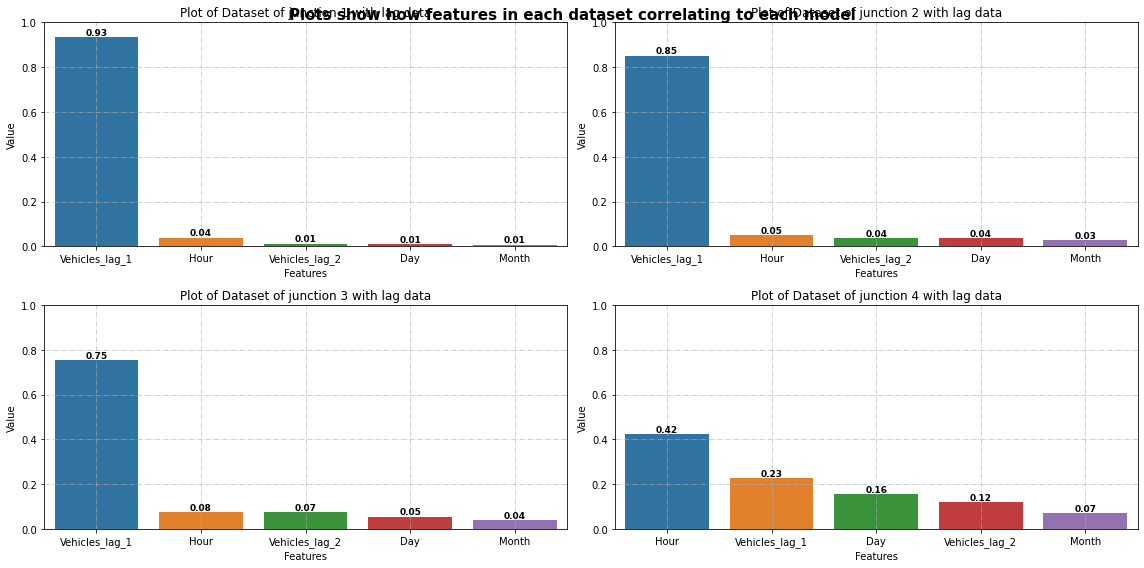

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
k = 1
for i in range(2):
    for j in range(2):
        lag_models[k].feature_importances(ax[i, j])
        k += 1
f.suptitle('Plots show how features in each dataset correlating to each model', fontsize=15, fontweight='bold')        
f.tight_layout()

#### Traffic Prediction : (1 Mark)

Predict the vehicle traffic for next 2 months:



In [ ]:
for junction in range(1, 5):
    cur_time = lag_data[junction].tail(1).index[0] # get the current time, the last time of that dataset
    end_time = pd.Timestamp(2017, 9, 1, 0, 0, 0) # the end time after 4 months that we want to predict
    new_data = lag_data[junction].copy() # create a copy of dataset with that junction
    features = lag_models[junction].features # get features of each models in that junction
    while cur_time != end_time:
        last = new_data.tail(1).copy() # get the last row of dataset, just make a copy!
        new_data = pd.concat([new_data, last]) # concatenate the copy dataset with it's last row
        for i in range(1, 3): # create lag data
            new_data[f'Vehicles_lag_{i}'] = new_data.Vehicles.shift(i) # shift by periods i
        new_data.iloc[len(new_data) - 1, [1, 2, 3]] = [cur_time.month, cur_time.day, cur_time.hour] # assign value for those columns
        last = new_data[features].tail(1).values # create a new last data that drop all nan
        new_data.iloc[len(new_data) - 1, 0] = round(lag_models[1].ml_model.predict(last)[0]) # predicting for vehicles
        cur_time += timedelta(hours=1) # add to a cur_time 1 hour
    new_data.index = pd.date_range(
        start=lag_data[junction].head(1).index.values[0],
        end=pd.Timestamp(2017, 9, 1, 0, 0, 0),
        freq='H'
    ) 
    new_data.to_csv(f'vehicles_for_next_2_months_in_junction_{junction}.csv') # to csv that file
    print(f'|==Predicted for Junction {junction}==|')

|==Predicted for Junction 1==|
|==Predicted for Junction 2==|
|==Predicted for Junction 3==|
|==Predicted for Junction 4==|
